In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline
pd.set_option('display.max_columns', 50)

In [5]:
df_prq = pd.read_csv(r"C:\Users\aakkewar\Documents\BOOTCAMP (PowerBI, SQL, Python, R)\Bits SEM 4\Project\dataset\complaints.csv")

parquet_file_path = r"C:\Users\aakkewar\Documents\BOOTCAMP (PowerBI, SQL, Python, R)\Bits SEM 4\Project\dataset\complaints_par.parquet"

df_prq.to_parquet(parquet_file_path, engine='pyarrow')

Industry use case : An NLP + Machine Learning model would make the classification of whether the consumer will dispute with the company or not and thus helping the company to prioritize the complaint based on the practice

In [6]:
df = pd.read_parquet(r"C:\Users\aakkewar\Documents\BOOTCAMP (PowerBI, SQL, Python, R)\Bits SEM 4\Project\dataset\complaints_par.parquet")

In [7]:
df.tail()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
4547849,2023-08-02,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,None,None,"EQUIFAX, INC.",TX,76036,None,Other,Web,2023-08-02,Closed with non-monetary relief,Yes,None,7337991
4547850,2023-08-02,"Payday loan, title loan, or personal loan",Installment loan,Problem with additional add-on products or ser...,None,None,None,NBT BANCORP INC.,NJ,08046,None,None,Phone,2023-08-02,Closed with explanation,Yes,None,7343156
4547851,2023-08-02,Mortgage,FHA mortgage,Struggling to pay mortgage,None,None,Company believes it acted appropriately as aut...,Chesmar Homes,TX,77316,None,Other,Web,2023-08-17,Closed with explanation,Yes,None,7340709
4547852,2023-08-02,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,None,None,"EQUIFAX, INC.",GA,30013,None,Consent not provided,Web,2023-08-02,Closed with explanation,Yes,None,7341166
4547853,2023-08-04,"Payday loan, title loan, or personal loan",Payday loan,Charged fees or interest you didn't expect,None,None,None,Flandreau Santee Sioux Tribe,TX,75057,None,Consent not provided,Web,2023-08-18,Closed with explanation,Yes,None,7350142


In [8]:
df['Consumer disputed?'].value_counts(normalize=True)*100

Consumer disputed?
No     80.687919
Yes    19.312081
Name: proportion, dtype: float64

In [12]:
df.shape

(4547854, 18)

In [13]:
df.replace('',np.nan, inplace=True)

In [14]:
df['Complaint ID'] = df['Complaint ID'].astype(str)
df.describe().T

,count,unique,top,freq
Date received,4547854,4430,2023-12-20,5844
Product,4547854,21,"Credit reporting, credit repair services, or o...",2163886
Sub-product,4312564,86,Credit reporting,2582127
Issue,4547854,177,Incorrect information on your report,1253035
Sub-issue,3822615,272,Information belongs to someone else,829589
Consumer complaint narrative,1649161,1366537,In accordance with the Fair Credit Reporting a...,3909
Company public response,2153178,11,Company has responded to the consumer and the ...,1915390
Company,4547854,7092,"EQUIFAX, INC.",903459
State,4503853,63,FL,536857
ZIP code,4517631,33329,XXXXX,109788


In [15]:
df.value_counts()

Date received  Product          Sub-product                            Issue                                  Sub-issue                             Consumer complaint narrative                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [16]:
df.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [17]:

df.Company.value_counts()

Company
EQUIFAX, INC.                                   903459
TRANSUNION INTERMEDIATE HOLDINGS, INC.          820729
Experian Information Solutions Inc.             751057
BANK OF AMERICA, NATIONAL ASSOCIATION           135920
WELLS FARGO & COMPANY                           123958
                                                 ...  
David E. Gray Attorney at Law LLC                    1
International Mortgage & Finance Group, Inc.         1
Brian McCaffrey, Attorney At Law                     1
Cayetano Development, LLC                            1
FHC Mortgage                                         1
Name: count, Length: 7092, dtype: int64

In [18]:

df.Product.value_counts()

Product
Credit reporting, credit repair services, or other personal consumer reports    2163886
Debt collection                                                                  528504
Credit reporting or other personal consumer reports                              441926
Mortgage                                                                         390811
Credit card or prepaid card                                                      206375
Checking or savings account                                                      197179
Credit reporting                                                                 140429
Credit card                                                                      111636
Bank account or service                                                           86205
Student loan                                                                      82818
Money transfer, virtual currency, or money service                                63302
Vehicle loan or lease   

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4547854 entries, 0 to 4547853
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  object
dtypes: object(18)
memory usage: 624.6+ MB


In [20]:
numeric_features = [feature for feature in df.columns if df[feature].dtype in ['int64', 'float64']]
categorial_features = [feature for feature in df.columns if df[feature].dtype in ['object']]

print('we have {} numerical feature : {}'.format(len(numeric_features), numeric_features))
print('\nwe have {} categorical features : {}'.format(len(categorial_features), categorial_features))

we have 0 numerical feature : []

we have 18 categorical features : ['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue', 'Consumer complaint narrative', 'Company public response', 'Company', 'State', 'ZIP code', 'Tags', 'Consumer consent provided?', 'Submitted via', 'Date sent to company', 'Company response to consumer', 'Timely response?', 'Consumer disputed?', 'Complaint ID']


Checking Null Values

In [21]:
missing = df.isnull().sum().div(df.shape[0]).mul(100).to_frame().sort_values(by=0, ascending = False)
missing

,0
Tags,90.035850
Consumer disputed?,83.105944
Consumer complaint narrative,63.737600
Company public response,52.655076
Consumer consent provided?,20.112629
Sub-issue,15.946840
Sub-product,5.173649
State,0.967511
ZIP code,0.664555
Company response to consumer,0.000176


In [22]:
#checking null vlaues
df.isnull().sum().div(df.shape[0]).mul(100).to_frame().sort_values(by=0, ascending = False)

,0
Tags,90.035850
Consumer disputed?,83.105944
Consumer complaint narrative,63.737600
Company public response,52.655076
Consumer consent provided?,20.112629
Sub-issue,15.946840
Sub-product,5.173649
State,0.967511
ZIP code,0.664555
Company response to consumer,0.000176


In [23]:
#  Tags	, ZIP code, Complaint ID, Sub-issue, Sub-product, Company public response	
drop_columns = ["Tags"	,"ZIP code", "Complaint ID", "Sub-issue", "Sub-product", "Company public response"]
df.drop(drop_columns, axis=1, inplace=True)

In [24]:
#Number of unique values in each column

for col in df.columns:
    print(col,df[col].nunique())

Date received 4430
Product 21
Issue 177
Consumer complaint narrative 1366537
Company 7092
State 63
Consumer consent provided? 4
Submitted via 7
Date sent to company 4379
Company response to consumer 8
Timely response? 2
Consumer disputed? 2


#Visualization    
4.1 Visualize the Target Feature (Customer Disputed)    
whether the consumer disputed the company's response   

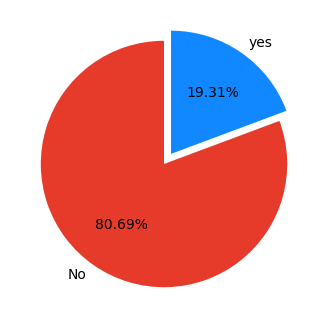

In [25]:
percentage = df["Consumer disputed?"].value_counts(normalize=True)*100
label = ["No", "yes"]

fig, ax = plt.subplots(figsize = (8,4))
explode = (0, 0.1)
colors = ["#e63a2a", '#1188ff']

ax.pie(percentage, labels =label, startangle = 90, autopct='%1.2f%%', explode=explode, shadow=False, colors=colors)
plt.show()

From the chart it is clear that Target variable is imbalanced    
What is imbalanced data -> Imbalanced data are the types of data where the target class has an uneven distribution of observations, i.e. Here number of not-stroke has more count than the number of stroke of the dataset

Products on which the complaints were made

In [26]:
df.Product.to_frame()

,Product
0,Credit reporting or other personal consumer re...
1,Credit reporting or other personal consumer re...
2,Credit reporting or other personal consumer re...
3,Credit reporting or other personal consumer re...
4,Credit reporting or other personal consumer re...
...,...
4547849,"Credit reporting, credit repair services, or o..."
4547850,"Payday loan, title loan, or personal loan"
4547851,Mortgage
4547852,"Credit reporting, credit repair services, or o..."


In [27]:
product_percentage = df['Product'].value_counts(normalize=True)*100
product_percentage.to_frame()[0:10]

,proportion
Product,
"Credit reporting, credit repair services, or other personal consumer reports",47.580375
Debt collection,11.620954
Credit reporting or other personal consumer reports,9.717242
Mortgage,8.593306
Credit card or prepaid card,4.537855
Checking or savings account,4.335649
Credit reporting,3.087808
Credit card,2.454696
Bank account or service,1.895509


Visualize product percentage in a pie chart

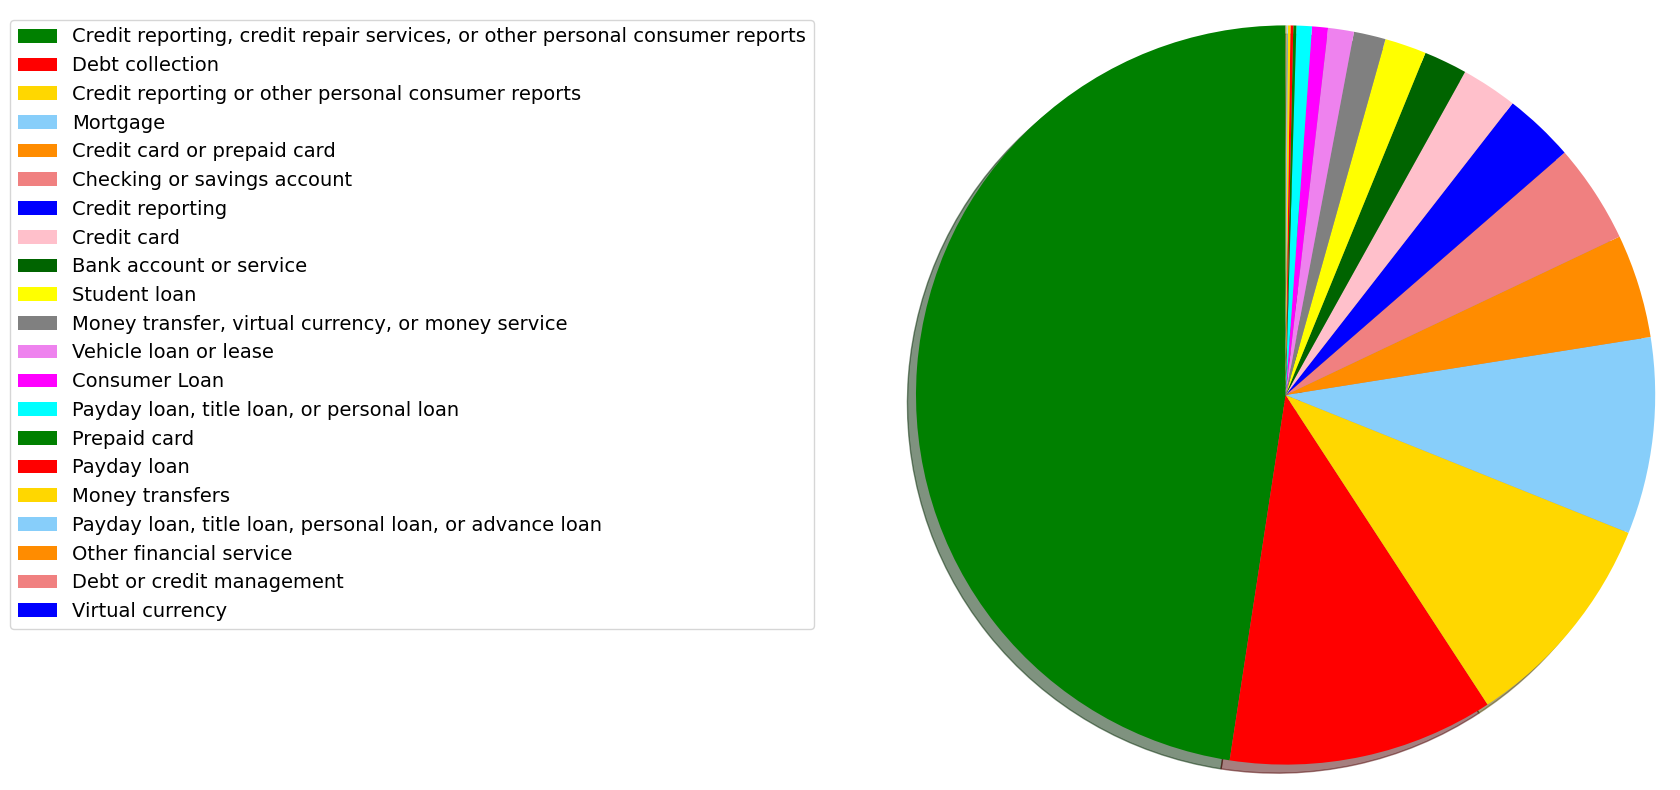

In [28]:
product_labels = product_percentage.index
colors = ['green', 'red', 'gold', 'lightskyblue', 'darkorange', 'lightcoral', 'blue', 'pink', 'darkgreen', 'yellow', 'grey', 'violet', 'magenta', 'cyan']
labels = product_labels
fig, ax = plt.subplots(figsize = (18,10))
patches, texts = ax.pie(product_percentage, startangle= 90, shadow=True, colors=colors, radius=1.2)
plt.legend(patches,labels , loc='best', bbox_to_anchor=(-0.1,1.), fontsize=14)
plt.show()

Insight :   
1. Credit reporting  had the most finance complaints products which is 47.58%
2. it is followed by debt collection product which is 11% of total

Sates in US and their impact on target feature
1. The state of the mailing address provided by the consumer.

In [29]:
top_states = df.State.value_counts(normalize=True)*100
top_states.to_frame()

,proportion
State,
FL,11.919949
CA,11.700937
TX,10.522657
GA,6.805751
NY,6.479075
...,...
AA,0.001310
MP,0.001199
AS,0.001021


<Axes: xlabel='State'>

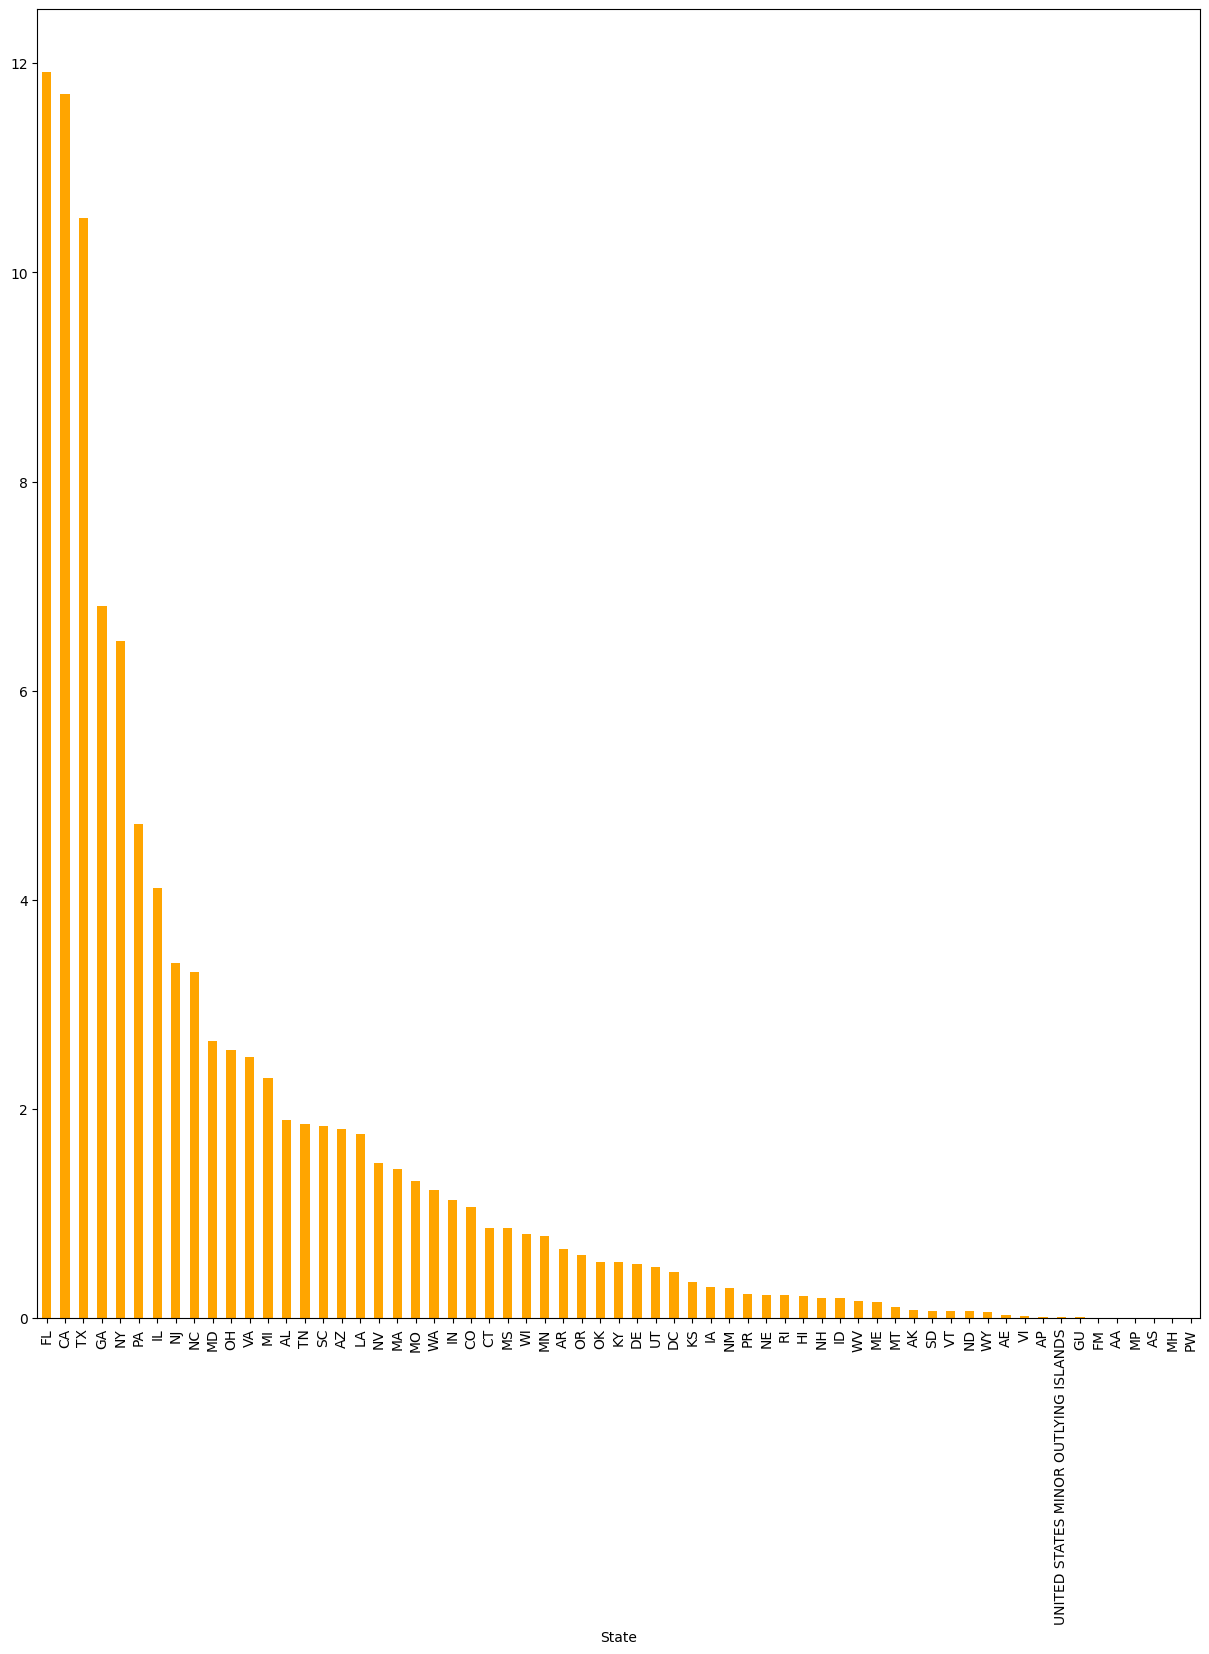

In [30]:
plt.subplots(figsize=(15,17))
top_states.plot(kind='bar', color='orange')

Insights:
1. FL Florida has the highest number of complaints registered which is 11.91 % of the total complaints
2. Then followed by CA  California with 11.70 %

Company's response and its effect on Target feature
1. The company's mandatory response for the particular complaint

In [31]:
df.columns

Index(['Date received', 'Product', 'Issue', 'Consumer complaint narrative',
       'Company', 'State', 'Consumer consent provided?', 'Submitted via',
       'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?'],
      dtype='object')

In [32]:
df.groupby('Company response to consumer')['Consumer disputed?'].value_counts(normalize=True).to_frame()*100

proportion
Company response to consumer    Consumer disputed?            
Closed                          No                   79.416274
                                Yes                  20.583726
Closed with explanation         No                   78.771390
                                Yes                  21.228610
Closed with monetary relief     No                   89.415405
                                Yes                  10.584595
Closed with non-monetary relief No                   88.370777
                                Yes                  11.629223
Closed with relief              No                   86.651584
                                Yes                  13.348416
Closed without relief           No                   73.074771
                                Yes                  26.925229
Untimely response               No                   99.927167
                                Yes                   0.072833

Proportion of consumer who has disputed and Company's response

In [33]:
disputed_df = df.loc[df['Consumer disputed?'] == 'Yes']
disputed_df['Company response to consumer'].value_counts(normalize=True)*100

Company response to consumer
Closed with explanation            82.690830
Closed with non-monetary relief     7.479545
Closed with monetary relief         3.665638
Closed without relief               3.242394
Closed                              2.443085
Closed with relief                  0.477160
Untimely response                   0.001348
Name: proportion, dtype: float64

Visualization

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'In progress'),
  Text(1, 0, 'Closed with explanation'),
  Text(2, 0, 'Closed with non-monetary relief'),
  Text(3, 0, 'Closed with monetary relief'),
  Text(4, 0, 'Untimely response'),
  Text(5, 0, 'Closed'),
  Text(6, 0, 'Closed without relief'),
  Text(7, 0, 'Closed with relief')])

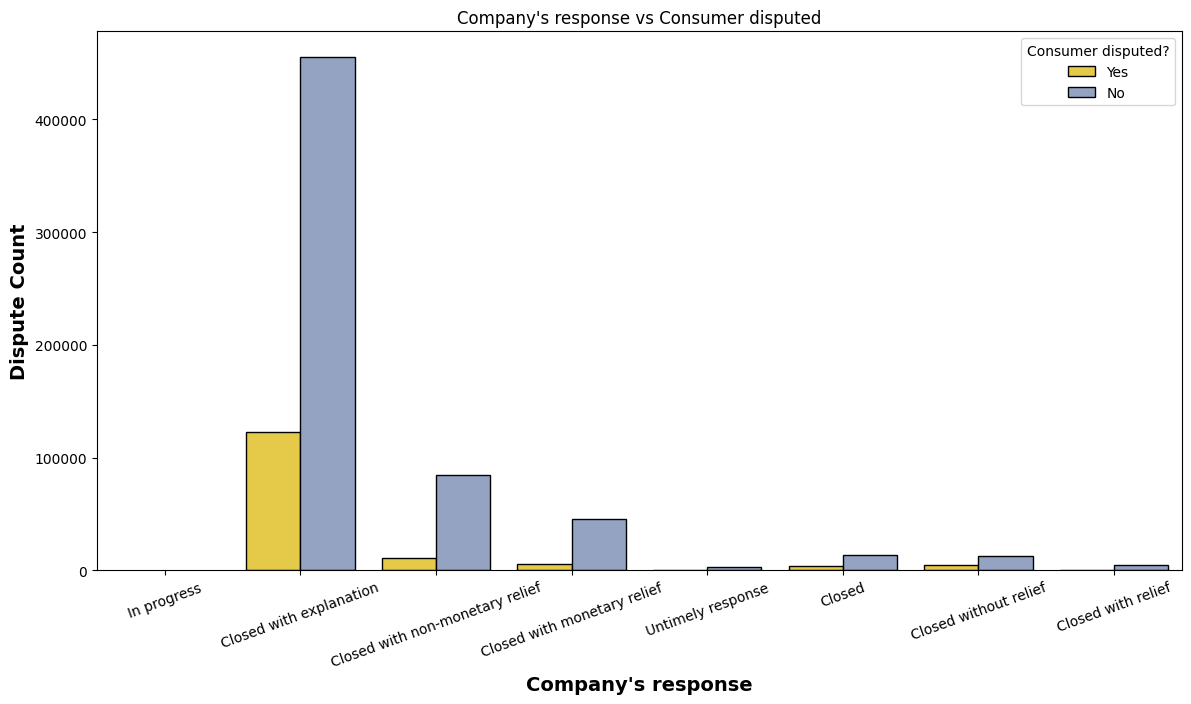

In [34]:
plt.subplots(figsize=(14,7))
sns.countplot(x='Company response to consumer', hue='Consumer disputed?', data=df, ec = 'black', palette = 'Set2_r')
plt.title("Company's response vs Consumer disputed")
plt.ylabel("Dispute Count", weight='bold', fontsize=14)
plt.xlabel("Company's response", weight='bold', fontsize=14)
plt.xticks(rotation=20)

Insight:

1. From the above report, the insight is most of the finance complaints where company's reponse id "Closed with explanation" has 82% of consumers dispute

Finance Complaint Year and Disputed Consumers count
1. The Year the CFPB received the complaint.
2. As this is the imblanced data. visualizing only the data in which consumer has dispute on the company's response

In [35]:
#create copy of disputed data
viz_df = disputed_df.copy()
viz_df['received_date']= pd.to_datetime(viz_df['Date received']).dt.date
viz_df['received_month']= pd.to_datetime(viz_df['Date received']).dt.month
viz_df['received_year']= pd.to_datetime(viz_df['Date received']).dt.year

In [36]:
viz_df.head()

,Date received,Product,Issue,Consumer complaint narrative,Company,State,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,received_date,received_month,received_year
2199,2016-11-09,Consumer Loan,Problems when you are unable to pay,On XXXX the XXXX I contacted my auto finance c...,"Prizm Financial Company, LLC",MO,Consent provided,Web,2016-11-09,Closed with explanation,Yes,Yes,2016-11-09,11,2016
9153,2012-07-31,Mortgage,"Loan modification,collection,foreclosure",None,Ocwen Financial Corporation,CA,None,Referral,2012-08-07,Closed with explanation,Yes,Yes,2012-07-31,7,2012
11694,2015-10-21,Debt collection,False statements or representation,None,"Kramer & Frank, P.C.",MO,Consent not provided,Web,2015-10-21,Closed with monetary relief,Yes,Yes,2015-10-21,10,2015
25608,2016-04-18,Consumer Loan,Problems when you are unable to pay,"Hi, I am looking for some help or answers. I h...",Credit Connection LLC,NE,Consent provided,Web,2016-05-31,Closed with explanation,Yes,Yes,2016-04-18,4,2016
26176,2016-11-02,Credit card,Identity theft / Fraud / Embezzlement,I 've recently encountered fraud on my Citi Co...,"CITIBANK, N.A.",CA,Consent provided,Web,2016-11-02,Closed with monetary relief,Yes,Yes,2016-11-02,11,2016


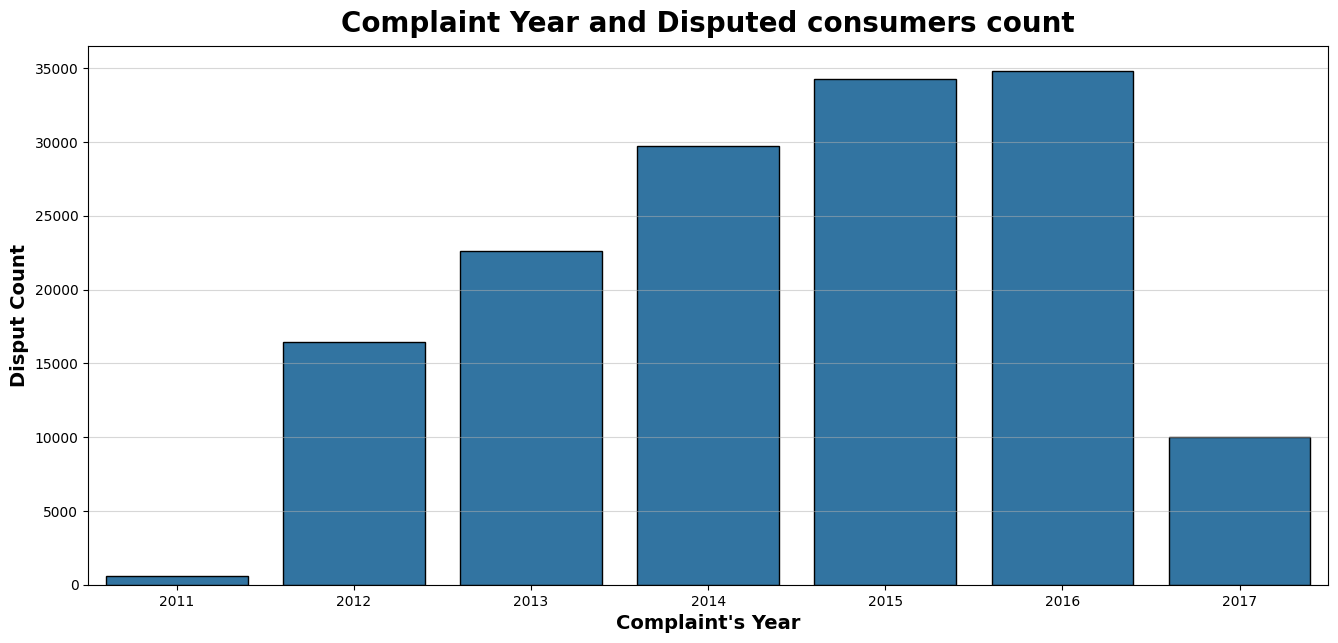

In [37]:
plt.subplots(figsize=(16,7))
sns.countplot(x='received_year', data=viz_df, ec="black")
plt.xticks(rotation =0)
plt.title("Complaint Year and Disputed consumers count", weight='bold', fontsize=20, pad=10)
plt.ylabel("Disput Count", weight="bold", fontsize=14)
plt.xlabel("Complaint's Year", weight="bold", fontsize=14)
plt.grid(alpha = 0.5, axis ="y")
plt.show()


Insight:
1. Complaints were highest on 2016 and 2015
2. Complaints were least on 2011 and 2017

Finance Complaints month and disputed consumers count
1. The monthe the CFPB received the complaint
Map the numerical months as month names

Map the numerical months as month names

In [38]:
map_months = {1 : 'January', 2 : 'February', 3 : 'March', 4 : 'April', 5 : 'May', 6 : 'June', 7 : 'July', 8 : 'August', 9 : 'September', 10 : 'October', 11:'November', 12 : 'December'}
viz_df = viz_df.replace({"received_month": map_months})

In [39]:
viz_df.head()

,Date received,Product,Issue,Consumer complaint narrative,Company,State,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,received_date,received_month,received_year
2199,2016-11-09,Consumer Loan,Problems when you are unable to pay,On XXXX the XXXX I contacted my auto finance c...,"Prizm Financial Company, LLC",MO,Consent provided,Web,2016-11-09,Closed with explanation,Yes,Yes,2016-11-09,November,2016
9153,2012-07-31,Mortgage,"Loan modification,collection,foreclosure",None,Ocwen Financial Corporation,CA,None,Referral,2012-08-07,Closed with explanation,Yes,Yes,2012-07-31,July,2012
11694,2015-10-21,Debt collection,False statements or representation,None,"Kramer & Frank, P.C.",MO,Consent not provided,Web,2015-10-21,Closed with monetary relief,Yes,Yes,2015-10-21,October,2015
25608,2016-04-18,Consumer Loan,Problems when you are unable to pay,"Hi, I am looking for some help or answers. I h...",Credit Connection LLC,NE,Consent provided,Web,2016-05-31,Closed with explanation,Yes,Yes,2016-04-18,April,2016
26176,2016-11-02,Credit card,Identity theft / Fraud / Embezzlement,I 've recently encountered fraud on my Citi Co...,"CITIBANK, N.A.",CA,Consent provided,Web,2016-11-02,Closed with monetary relief,Yes,Yes,2016-11-02,November,2016


Plot the months against the dispute data count

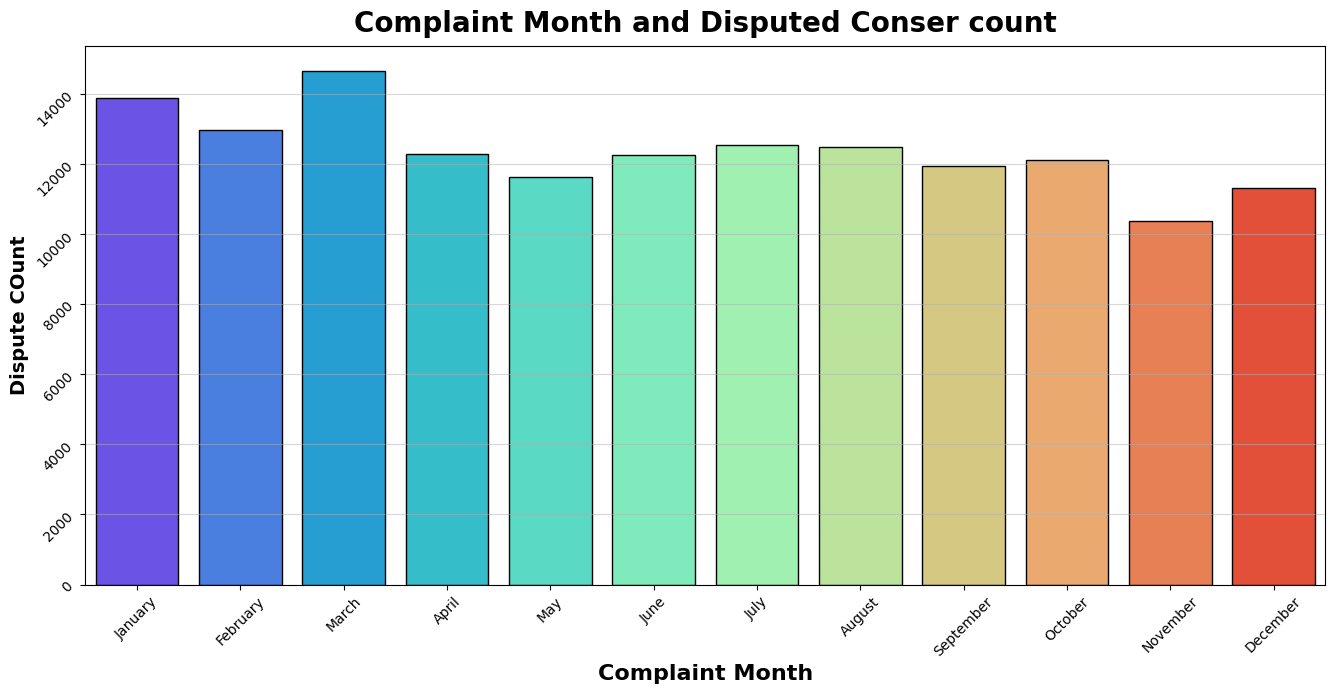

In [40]:
months_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
plt.subplots(figsize = (16,7))
sns.countplot(x='received_month', data = viz_df, ec = 'black', palette='rainbow', order=months_order)
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.title("Complaint Month and Disputed Conser count", weight= 'bold', fontsize=20, pad = 10)
plt.ylabel("Dispute COunt", weight="bold", fontsize=14)
plt.xlabel("Complaint Month", weight="bold", fontsize=16)
plt.grid(alpha=0.5, axis="y")
plt.show()

Insight:
1. Month of March had received more complaints than any other month
2. Q1 of the year had more financial complaints

In [41]:
df.head()

,Date received,Product,Issue,Consumer complaint narrative,Company,State,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?
0,2024-01-13,Credit reporting or other personal consumer re...,Incorrect information on your report,None,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",FL,Other,Web,2024-01-13,In progress,Yes,None
1,2024-01-12,Credit reporting or other personal consumer re...,Incorrect information on your report,None,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",FL,Other,Web,2024-01-12,In progress,Yes,None
2,2024-01-13,Credit reporting or other personal consumer re...,Incorrect information on your report,None,"EQUIFAX, INC.",FL,None,Web,2024-01-13,In progress,Yes,None
3,2024-01-13,Credit reporting or other personal consumer re...,Unable to get your credit report or credit score,None,FISERV INC.,CA,None,Web,2024-01-13,In progress,Yes,None
4,2024-01-13,Credit reporting or other personal consumer re...,Incorrect information on your report,None,"EQUIFAX, INC.",GA,None,Web,2024-01-13,In progress,Yes,None


Complaints Submission
1. How the complaints was submitted to the CFPB. For example, "Web" or "phone"

In [42]:
df["Submitted via"].value_counts(normalize=True).to_frame()*100

,proportion
Submitted via,
Web,88.186296
Referral,5.383198
Phone,3.807686
Postal mail,2.022009
Fax,0.564178
Web Referral,0.027288
Email,0.009345


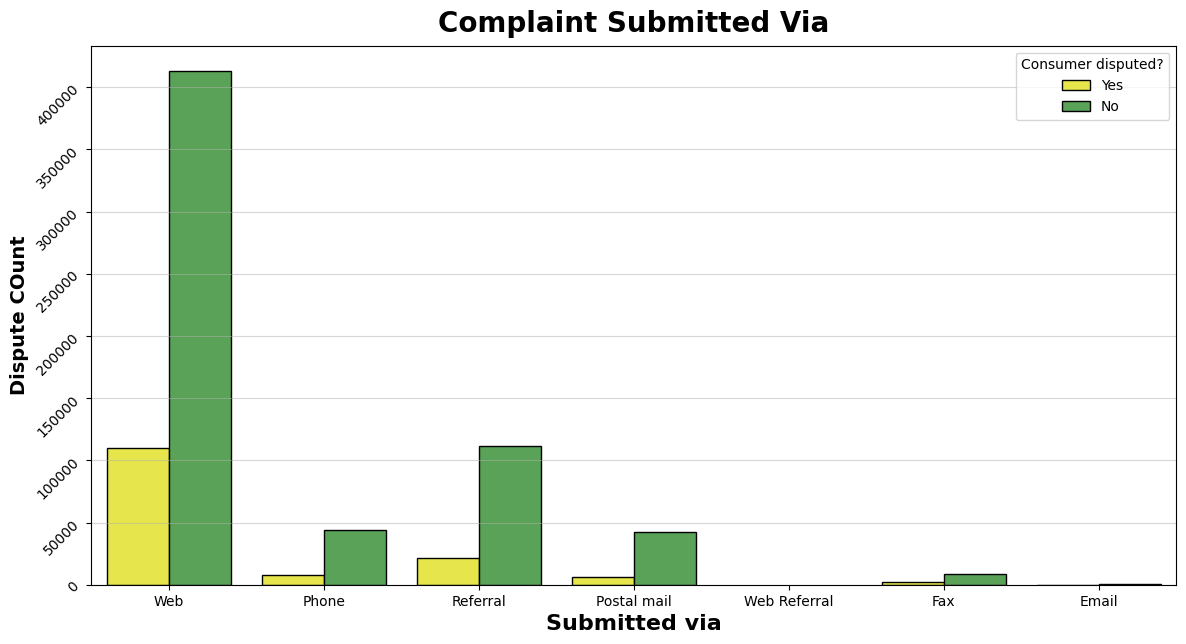

In [43]:
plt.subplots(figsize=(14,7))
sns.countplot(x="Submitted via", hue="Consumer disputed?", data=df, ec = "black", palette="Set1_r")
plt.yticks(rotation = 45)
plt.title("Complaint Submitted Via", weight= 'bold', fontsize=20, pad = 10)
plt.ylabel("Dispute COunt", weight="bold", fontsize=14)
plt.xlabel("Submitted via", weight="bold", fontsize=16)
plt.grid(alpha=0.5, axis="y")
plt.show()

Insight:
1. 88% of total complaints were submitted via Web.
2. Second most used platform to submit id referral then followed by referral

Timely response has any effect on Target column

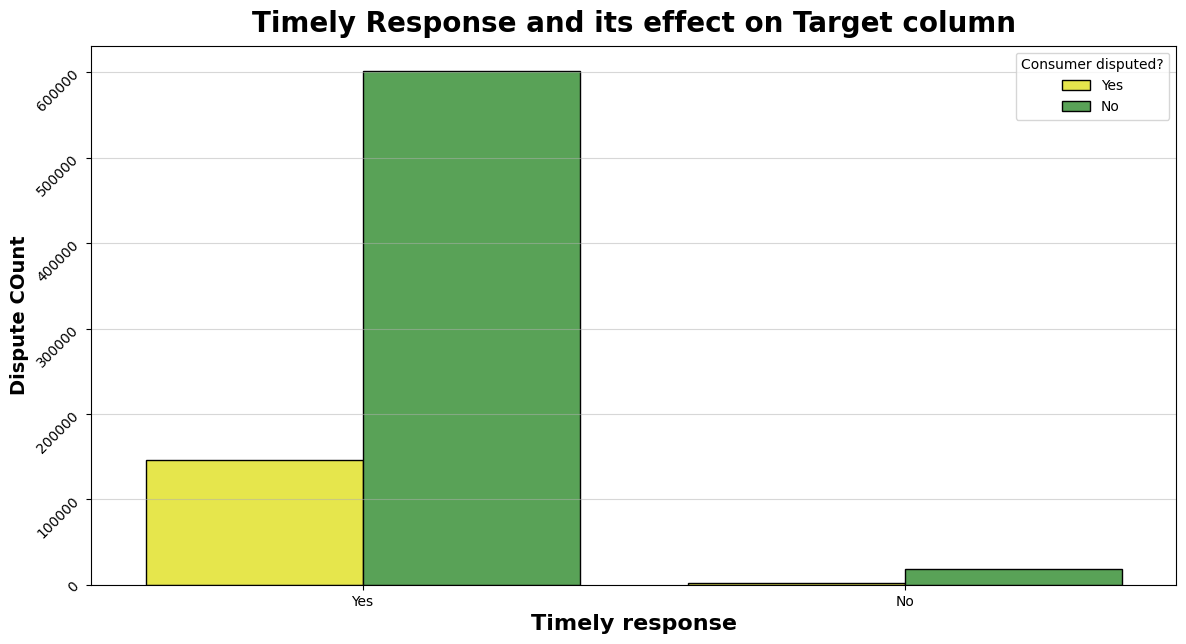

In [44]:
plt.subplots(figsize=(14,7))
sns.countplot(x="Timely response?", hue="Consumer disputed?", data=df, ec = "black", palette="Set1_r")
plt.yticks(rotation = 45)
plt.title("Timely Response and its effect on Target column", weight= 'bold', fontsize=20, pad = 10)
plt.ylabel("Dispute COunt", weight="bold", fontsize=14)
plt.xlabel("Timely response", weight="bold", fontsize=16)
plt.grid(alpha=0.5, axis="y")
plt.show()

Insight:
1. Most of the complaints which had timely response also had consumer disputed
2. No much impact on target column

Consumer consent provided and ites effect on Target column
1. here consent provided columns is approval given by the consumer on publishing their complaints public

In [45]:
plt.subplots(figsize=(14,7))
sns.countplot(x="Consumer consent provided?", hue="Consumer disputed?", data=df, ec = "black", palette="Set1_r")
plt.yticks(rotation = 45)
plt.title("Consumer consent provided vs Consumer disputed", weight= 'bold', fontsize=20, pad = 10)
plt.ylabel("Dispute COunt", weight="bold", fontsize=14)
plt.xlabel("Consent Provided", weight="bold", fontsize=16)
plt.grid(alpha=0.5, axis="y")
plt.show()

Insights
1. Most of the Record here is not available N/A
2. Consent Provided has more impact on the target variable, because most consumer wanted complaints to be public

Final Report:
1. Dataset is collected from consumerfinance US government websit
2. tags, complaints_what_happened, company_public_response, sub_issue, sub_product, zip_code, complaint_id are the columns which can be removed as they are redundant or does not help the model
3. company its a name column can be removed as it contains 4284 unique values, which cannot be used in model
4. new feature can be created days_to_forward_complaint whihc is the difference between data_sent_to_comapany - date_received.
5. issue column is a text column, so text processing can be done and vectorized by tfidf for model traning
6. Null values can be imputed with mode